Ovaj primer demonstrira koriscenje Keras biblioteke u zadacima klasifikacije. Na osnovu skupa podataka koji sadrzi informacije o tumorima, potrebno je zakljuciti da li je rec o benignim ili malignim tumorima.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers

Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [4]:
np.random.seed(7)

Ucitavamo skup podataka i vrsimo pripremne korake.

In [5]:
data = datasets.load_breast_cancer()

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size = 0.33, random_state = 7)

In [7]:
x_train.shape

(381, 30)

In [8]:
number_of_features = x_train.shape[1]
output_size = 1

In [9]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Pravimo mrezu sa propagacijom unapred. 
<br>
Mreza ce imati ulazni sloj, dva skrivena sloja sa 100 i 40 neurona i izlazni sloj.
<br>
Broj neurona ulaznog sloja odgovara broju atributa skupa podataka (30). 
<br>
Broj neurona izlaznog sloja je 1. 

In [10]:
model = Sequential()

In [11]:
model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))

In [12]:
model.add(Dense(units=40, activation='relu'))

In [13]:
model.add(Dense(units=output_size, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 7,181
Trainable params: 7,181
Non-trainable params: 0
_________________________________________________________________


Prilikom treniranja modela, jedan deo podataka ce biti iskoriscen za validaciju. 

In [16]:
history = model.fit(x_train, y_train, epochs= 30, batch_size=16, verbose=1, validation_split=0.3)

Train on 266 samples, validate on 115 samples
Epoch 1/30
266/266 [==============================] - 0s 692us/step - loss: 0.5608 - acc: 0.6541 - val_loss: 0.2755 - val_acc: 0.9478
Epoch 2/30
266/266 [==============================] - 0s 279us/step - loss: 0.2211 - acc: 0.9361 - val_loss: 0.1516 - val_acc: 0.9652
Epoch 3/30
266/266 [==============================] - 0s 275us/step - loss: 0.1439 - acc: 0.9398 - val_loss: 0.1059 - val_acc: 0.9739
Epoch 4/30
266/266 [==============================] - 0s 276us/step - loss: 0.1109 - acc: 0.9511 - val_loss: 0.0816 - val_acc: 0.9826
Epoch 5/30
266/266 [==============================] - 0s 269us/step - loss: 0.0920 - acc: 0.9624 - val_loss: 0.0691 - val_acc: 0.9826
Epoch 6/30
266/266 [==============================] - 0s 258us/step - loss: 0.0797 - acc: 0.9774 - val_loss: 0.0611 - val_acc: 0.9826
Epoch 7/30
266/266 [==============================] - 0s 235us/step - loss: 0.0690 - acc: 0.9887 - val_loss: 0.0571 - val_acc: 0.9739
Epoch 8/30
266/2

In [17]:
epochs = history.epoch

In [18]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

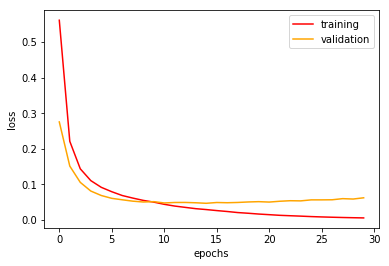

In [19]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

Sa ovog grafika mozemo da zakljucimo da se nakon osme epohe model preprilagodjava podacima (vrednosti funkcije gubitka na validacionom skupu ne opadaju). 

In [20]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

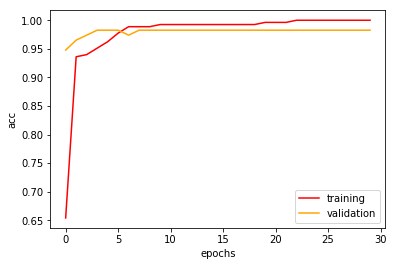

In [21]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

Ovaj grafik, takodje, potvrdjuje da se nakon osme epohe tacnost modela ne unapredjuje (tacnost na validacionom skupu stagnira).

In [22]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

188/188 [==============================] - 0s 63us/step
Test loss: 0.08465776666800709, test accuracy: 0.9787234042553191


In [23]:
model.fit(x_train, y_train, epochs=8, batch_size=16)

Epoch 1/8
381/381 [==============================] - 0s 237us/step - loss: 0.0233 - acc: 0.9948
Epoch 2/8
381/381 [==============================] - 0s 223us/step - loss: 0.0220 - acc: 0.9948
Epoch 3/8
381/381 [==============================] - 0s 214us/step - loss: 0.0176 - acc: 0.9948
Epoch 4/8
381/381 [==============================] - 0s 204us/step - loss: 0.0134 - acc: 0.9974
Epoch 5/8
381/381 [==============================] - 0s 206us/step - loss: 0.0134 - acc: 0.9974
Epoch 6/8
381/381 [==============================] - 0s 210us/step - loss: 0.0102 - acc: 0.9974
Epoch 7/8
381/381 [==============================] - 0s 205us/step - loss: 0.0081 - acc: 1.0000
Epoch 8/8
381/381 [==============================] - 0s 213us/step - loss: 0.0076 - acc: 0.9974
